
Fast Gradient Algorithm Coefficients:
 [ 0.02117385 -0.03877237  0.09773528  0.05503457  0.1525669   0.1353421
  0.28353643  0.15114095  0.1128095   0.0618343   0.10500655 -0.04220304
  0.03473199  0.02859179  0.10918831  0.27363849  0.1737305   0.12517056
  0.12909993  0.12242491  0.22405007  0.10833402  0.24549892  0.16656819
 -0.14753838 -0.10493502 -0.11498727 -0.06087623 -0.04741843 -0.06626842
 -0.02882372 -0.01515087 -0.07621345 -0.01594128 -0.04244589 -0.01357764
 -0.0770028  -0.03415858 -0.07954387  0.01734151 -0.04773062 -0.0908281
 -0.06004538 -0.06969734 -0.11272028 -0.11263942 -0.03213642 -0.0620666
 -0.05727729 -0.04253486 -0.02823661  0.1548533   0.2620447   0.05893829
  0.06871691  0.12510257  0.14819384]

Sci-kit Learn's LogisticRegression() Coefficients:
 [[ 0.02117345 -0.03877587  0.09773771  0.05503819  0.15256401  0.13534366
   0.28352681  0.15114461  0.11280873  0.06183421  0.10502022 -0.04219962
   0.03472887  0.02859174  0.10917878  0.27363777  0.17373109  0.12

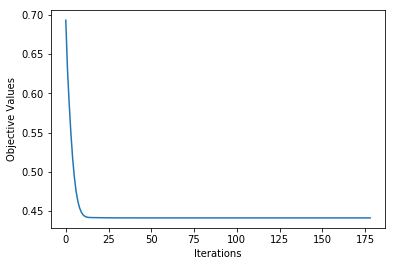

In [1]:
"""
This code shows an example implementing the fast gradient algorithm to compute
the beta coefficients and misclassification error. It compares the beta
coefficients to that of sklearn.
"""


import src.logistic_reg as lreg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline


# load dataset and drop NAs
spam = pd.read_table('https://statweb.stanford.edu/~tibs/ElemStatLearn/'
                     'datasets/spam.data', sep=' ', header=None)
spam = spam.dropna()
test_indicator = pd.read_table('https://statweb.stanford.edu/~tibs/'
                               'ElemStatLearn/datasets/spam.traintest',
                               sep=' ', header=None)

# declare data and labels
x_data = np.asarray(spam.drop(57, axis=1))
y_data = np.asarray(spam[57])*2 - 1
test_indicator = np.ravel(np.asarray(test_indicator))

# define the split between train and test data
x_train = x_data[test_indicator == 0, :]
x_test = x_data[test_indicator == 1, :]
y_train = y_data[test_indicator == 0]
y_test = y_data[test_indicator == 1]

# standardize the data
x_scaler = StandardScaler().fit(x_train)
x_train = x_scaler.transform(x_train)
x_test = x_scaler.transform(x_test)
n = x_train.shape[0]
d = x_train.shape[1]

# initialize the beta and theta values
beta_init = np.zeros(d)
theta_init = np.zeros(d)

# run the fast gradient algorithm to find the beta coefficients
fastgrad_betas = lreg.fastgradalgo(beta_init=beta_init,
                                   theta_init=theta_init,
                                   lamb=0.1,
                                   x=x_train,
                                   y=y_train,
                                   max_iter=1000)

# run sci-kit learn's LogisticRegression() to find the beta coefficients
logit = LogisticRegression(C=1/(2*n*0.1),
                           fit_intercept=False,
                           tol=1e-8).fit(x_train, y_train)

# print the coefficients found using the fast gradient algorithm and sklearn
print("\nFast Gradient Algorithm Coefficients:\n", fastgrad_betas[-1])
print("\nSci-kit Learn's LogisticRegression() Coefficients:\n", logit.coef_)

# apply the coefficients found using the fast gradient algorithm to test set
y_predict = (np.dot(x_test, fastgrad_betas[-1]) > 0)*2 - 1

# print the misclassification error
print("\nMisclassification Error: %.2f%%" % (np.mean(y_predict != y_test)*100))

# initialize list for all objective values
objective_values = []

# iterate over coefficients and calculate objective values
for i in fastgrad_betas:
    objective_values.append(lreg.computeobj(beta=i, lamb=0.1, x=x_train, y=y_train))

# plot objective values against iterations
plt.plot(range(len(objective_values)), objective_values);
plt.xlabel('Iterations');
plt.ylabel('Objective Values');
